In [ ]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [ ]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [ ]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/AMI_Ear_Database'
valid_path = '/content/drive/MyDrive/AMI_Ear_Database'

In [ ]:
inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

87924736/87910968 [==============================] - 5s 0us/step


In [ ]:
for layer in inception.layers:
    layer.trainable = False

In [ ]:
folders = glob('/content/drive/MyDrive/AMI_Ear_Database/*')

In [ ]:
x = Flatten()(inception.output)

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [ ]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/AMI_Ear_Database',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 700 images belonging to 100 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/AMI_Ear_Database',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 700 images belonging to 100 classes.


In [ ]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/20
22/22 [==============================] - 452s 20s/step - loss: 30.6860 - accuracy: 0.1086 - val_loss: 17.3964 - val_accuracy: 0.3714
Epoch 2/20
22/22 [==============================] - 17s 801ms/step - loss: 11.0110 - accuracy: 0.4471 - val_loss: 2.9447 - val_accuracy: 0.7314
Epoch 3/20
22/22 [==============================] - 17s 789ms/step - loss: 3.9372 - accuracy: 0.6743 - val_loss: 1.6178 - val_accuracy: 0.8214
Epoch 4/20
22/22 [==============================] - 18s 809ms/step - loss: 1.9335 - accuracy: 0.7900 - val_loss: 0.7357 - val_accuracy: 0.8986
Epoch 5/20
22/22 [==============================] - 17s 765ms/step - loss: 1.3440 - accuracy: 0.8457 - val_loss: 0.8179 - val_accuracy: 0.9071
Epoch 6/20
22/22 [==============================] - 17s 758ms/step - loss: 1.3167 - accuracy: 0.8586 - val_loss: 0.4192 - val_accuracy: 0.9414
Epoch 7/20
22/22 [==============================] - 17s 760ms/step - loss: 1.3842 - accuracy: 0.8643 - val_loss: 0.4087 - val_accuracy: 0.94

In [ ]:
import matplotlib.pyplot as plt

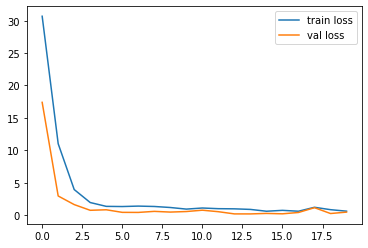

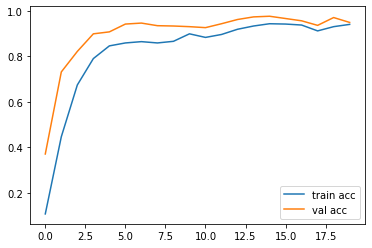

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
from tensorflow.keras.models import load_model

model.save('model_inception.h5')

In [24]:
scores = model.evaluate(test_set)

22/22 [==============================] - 5s 240ms/step - loss: 0.4558 - accuracy: 0.9486
